# **HOTEL BOOKING CANCELLATION PREDICTION**

![hotel booking](../images/image-hotel.png)

## **Problem Statement**

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

## **Objetive**

Build a model that allow to predict a clients to cancel the booking

## **About Dataset**


| Column Name | Data Type | Description |
| --- | --- | --- |
| hotel | categorical | Hotel where the reservation was made. |
| is_canceled | binary | Indicates if the reservation was canceled or not. |
| lead_time | integer | Number of days between the reservation entry date in the PMS and the arrival date. |
| arrival_date_year | integer | Year of the arrival date. |
| arrival_date_month | categorical | Month of the arrival date (January to December). |
| arrival_date_week_number | integer | Week number of the arrival date. |
| arrival_date_day_of_month | integer | Day of the month of the arrival date. |
| stays_in_weekend_nights | integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked. |
| stays_in_week_nights | integer | Number of week nights (Monday to Friday) the guest stayed or booked. |
| adults | integer | Number of adults. |
| children | integer | Number of children. |
| babies | integer | Number of babies. |
| meal | categorical | Type of meal booked. |
| country | categorical | Country of origin (ISO 3155–3:2013). |
| market_segment | categorical | Designation of the market segment. |
| distribution_channel | categorical | Channel of distribution of the reservation. |
| is_repeated_guest | binary | Indicates if the reservation was from a repeat guest (1) or not (0). |
| previous_cancellations | integer | Number of previous reservations canceled by the client before the current reservation. |
| previous_bookings_not_canceled | integer | Number of previous reservations not canceled by the client before the current reservation. |
| reserved_room_type | categorical | Code of the reserved room type. |
| assigned_room_type | categorical | Code of the assigned room type. |
| booking_changes | integer | Number of changes/modifications made to the reservation from the time it was entered in the PMS until the check-in or cancellation. |
| deposit_type | categorical | Indication of whether the client made a deposit to guarantee the reservation. |
| agent | integer | ID of the travel agency that made the reservation. |
| company | integer | ID of the company/entitiy that made the reservation or is responsible for paying the reservation. |
| days_in_waiting_list | integer | Number of days the reservation was on the waiting list before being confirmed to the client. |
| customer_type | categorical | Type of reservation. |
| adr | decimal | Average daily rate. |
| required_car_parking_spaces | integer | Number of parking spaces required by the client. |
| total_of_special_requests | integer | Number of special requests made by the client (e.g., double bed or high floor). |
| reservation_status | categorical | Last status of the reservation. |
| reservation_status_date | date | Date when the last status was established. |
| name | string | Name of the client. |
| email | string | Email address of the client. |
| phone | string | Phone number of the client. |
| credit_card | string | Last four digits of the client's credit card. |

## **Read and Pre-Clean the Data**

### Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [53]:
df_hotel_booking = pd.read_csv("../data/dataset.csv")
df_hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [54]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Drop Unnecessary columns

In [55]:
# Remove columns with personal information about customers
df_hotel_booking.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)
# Remove data leakeage
df_hotel_booking.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)

In [56]:
df_hotel_booking.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
16484,Resort Hotel,0,37,2015,August,35,27,1,3,2,...,A,0,No Deposit,241.0,NaN,0,Transient,104.97,0,1
45652,City Hotel,0,140,2015,November,47,18,0,3,2,...,A,0,No Deposit,29.0,NaN,87,Transient-Party,75.00,0,0
55359,City Hotel,1,398,2016,August,33,11,0,2,2,...,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0
63519,City Hotel,1,72,2017,February,7,13,1,0,2,...,A,0,No Deposit,9.0,NaN,0,Transient,79.20,0,1
32742,Resort Hotel,0,1,2017,March,11,18,2,1,2,...,D,3,No Deposit,NaN,159.0,0,Transient,45.00,0,1


## **Exploratory Data Analysis**

<Axes: >

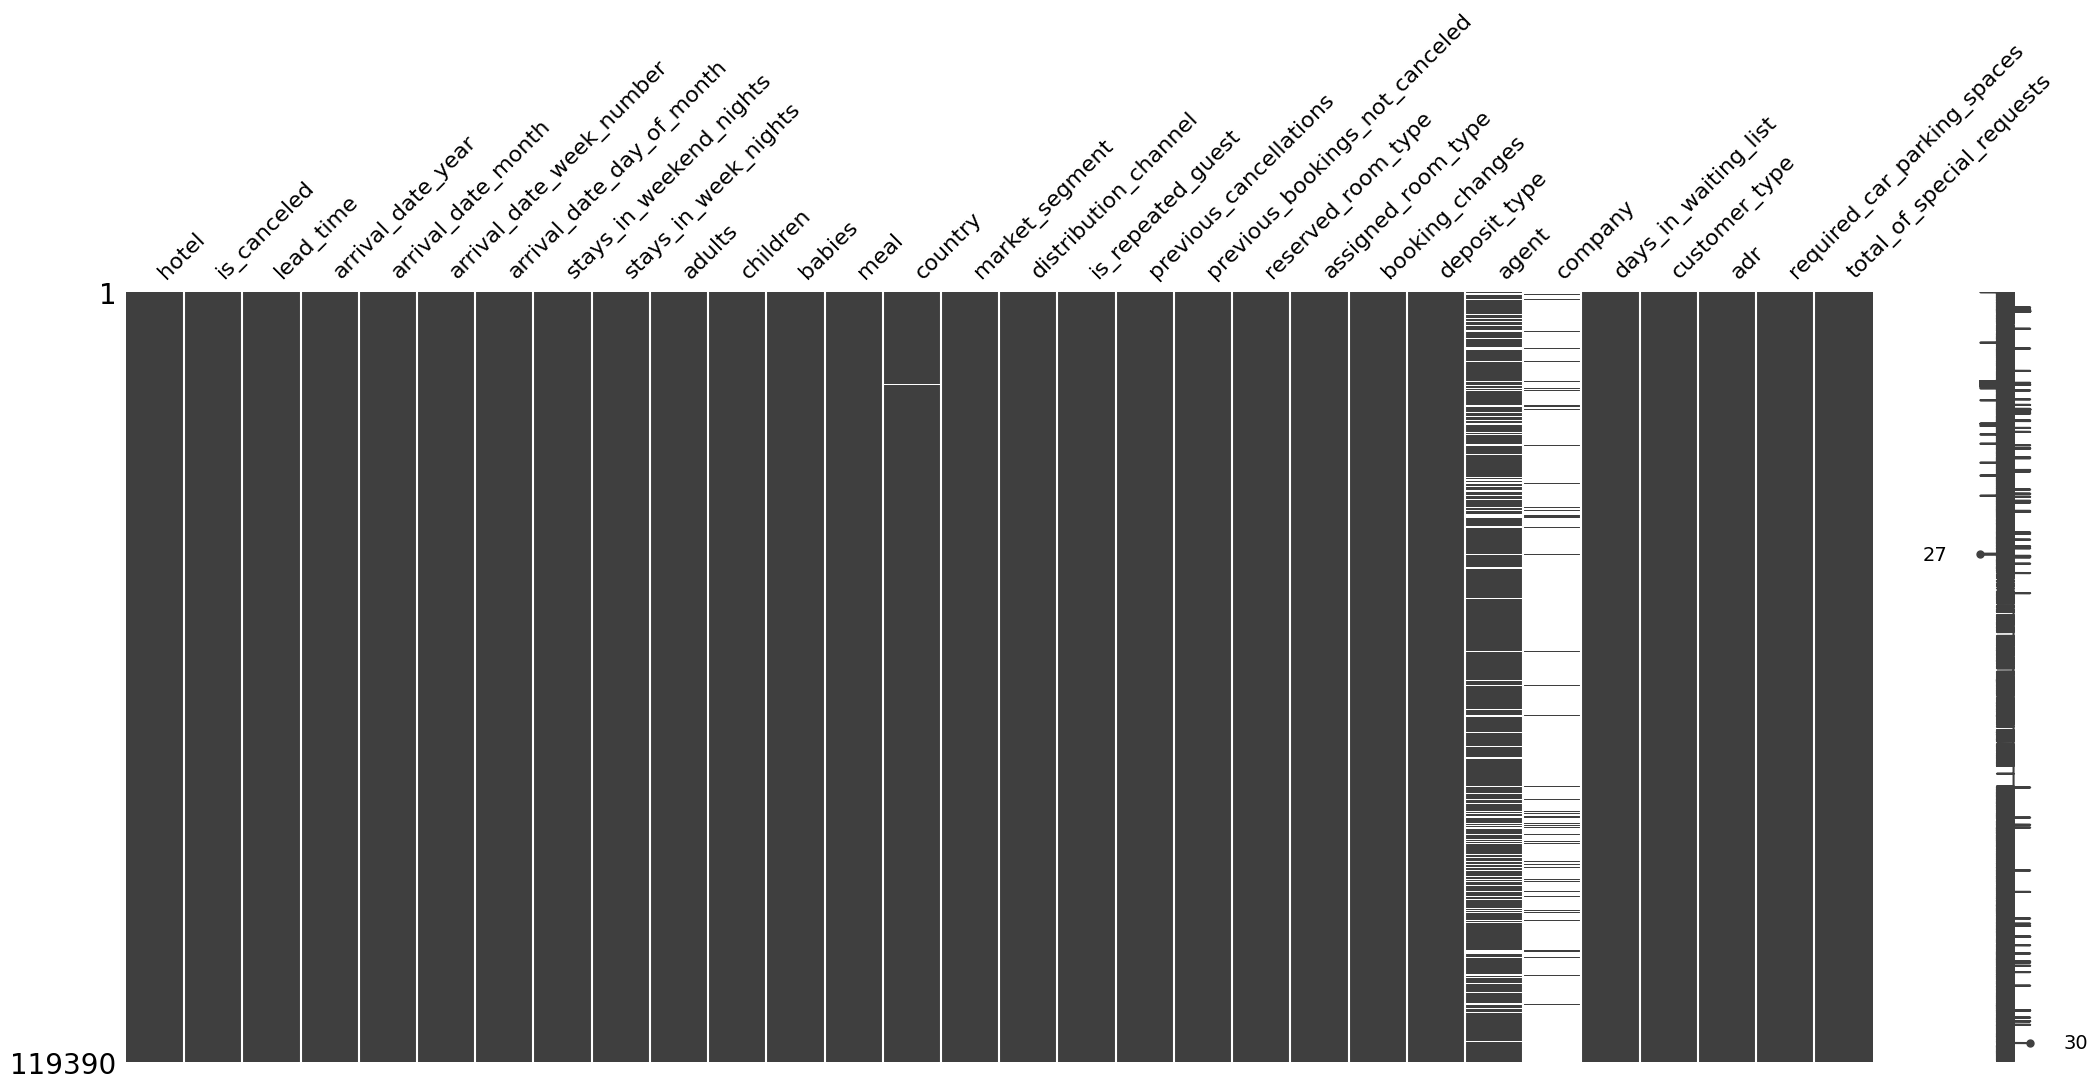

In [57]:
import missingno as msno

msno.matrix(df_hotel_booking)

In [58]:
# delete missing columns
del df_hotel_booking['company']

<Axes: ylabel='Frequency'>

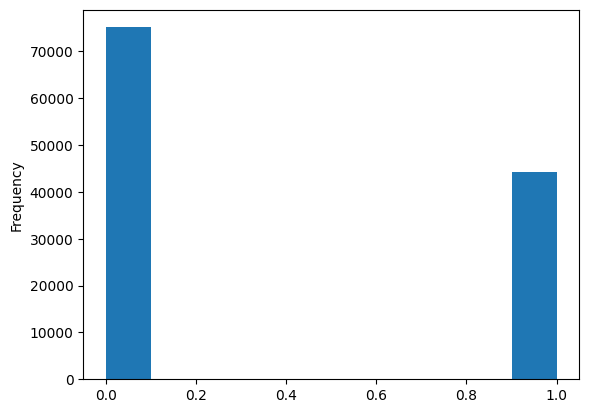

In [7]:
df_hotel_booking['is_canceled'].plot(kind='hist')

In [59]:
categorical_columns = df_hotel_booking.select_dtypes(include=[object]).columns
categorical_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')

In [60]:
numerical_columns = df_hotel_booking.select_dtypes(exclude=[object]).columns
numerical_columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [8]:
import seaborn as sns
def plot_histograms(df, numeric_cols):
    """
    Función para graficar múltiples histogramas para columnas numéricas de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos.
    numeric_cols (list): Una lista de nombres de columnas numéricas a graficar.
    """
    num_cols = len(numeric_cols)
    fig, axes = plt.subplots(nrows=int(num_cols / 3) + (num_cols % 3 > 0), ncols=3, figsize=(18, 6 * (int(num_cols / 3) + (num_cols % 3 > 0))))

    for i, col in enumerate(numeric_cols):
        row = i // 3
        col_idx = i % 3
        sns.histplot(data=df, x=col, kde=True, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f"Histograma para {col}")
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

In [12]:
def plot_barplots(df, categorical_cols):
    """
    Función para graficar múltiples barplots para columnas categóricas de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos.
    categorical_cols (list): Una lista de nombres de columnas categóricas a graficar.
    """
    num_cols = len(categorical_cols)
    fig, axes = plt.subplots(nrows=int(num_cols / 3) + (num_cols % 3 > 0), ncols=3, figsize=(18, 6 * (int(num_cols / 3) + (num_cols % 3 > 0))))

    for i, col in enumerate(categorical_cols):
        row = i // 3
        col_idx = i % 3
        if df[col].dtype == 'object':  # Verificar si la columna es de tipo categoría
            df[col] = df[col].astype('category')  # Convertir la columna en categorías
        sns.countplot(data=df, x=col, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f"Barplot para {col}")
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

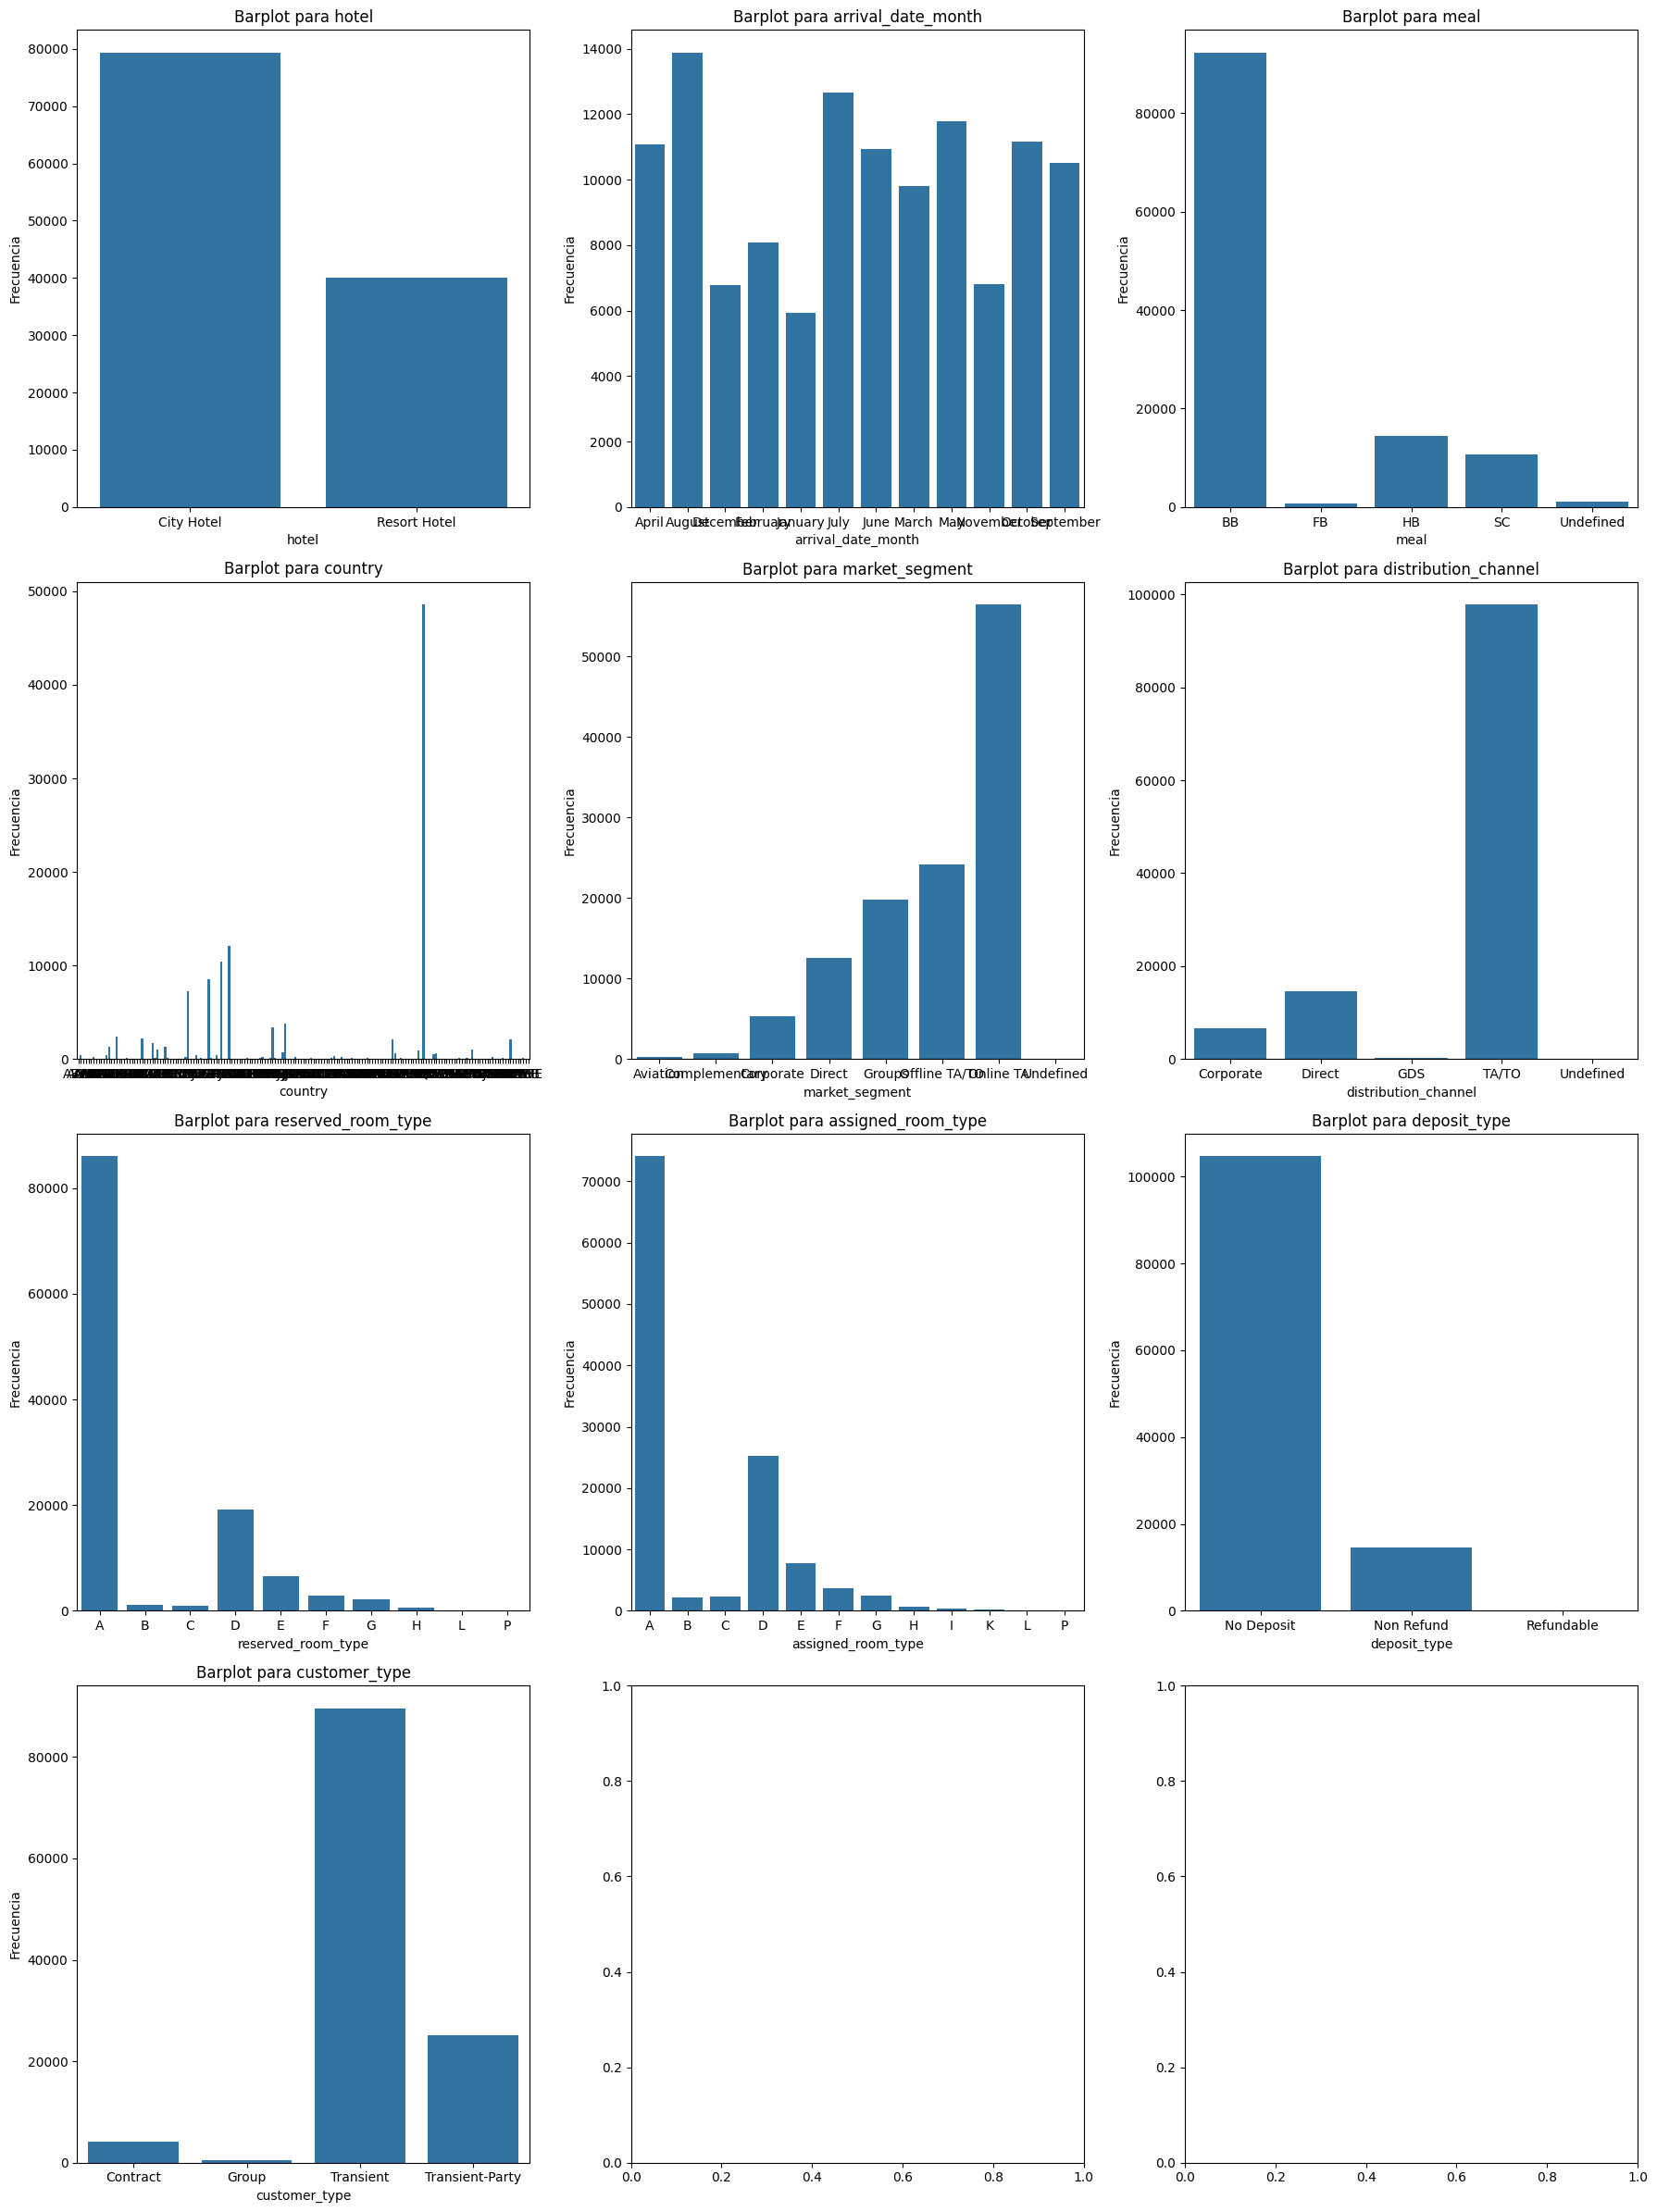

In [13]:
plot_barplots(df_hotel_booking, categorical_columns)

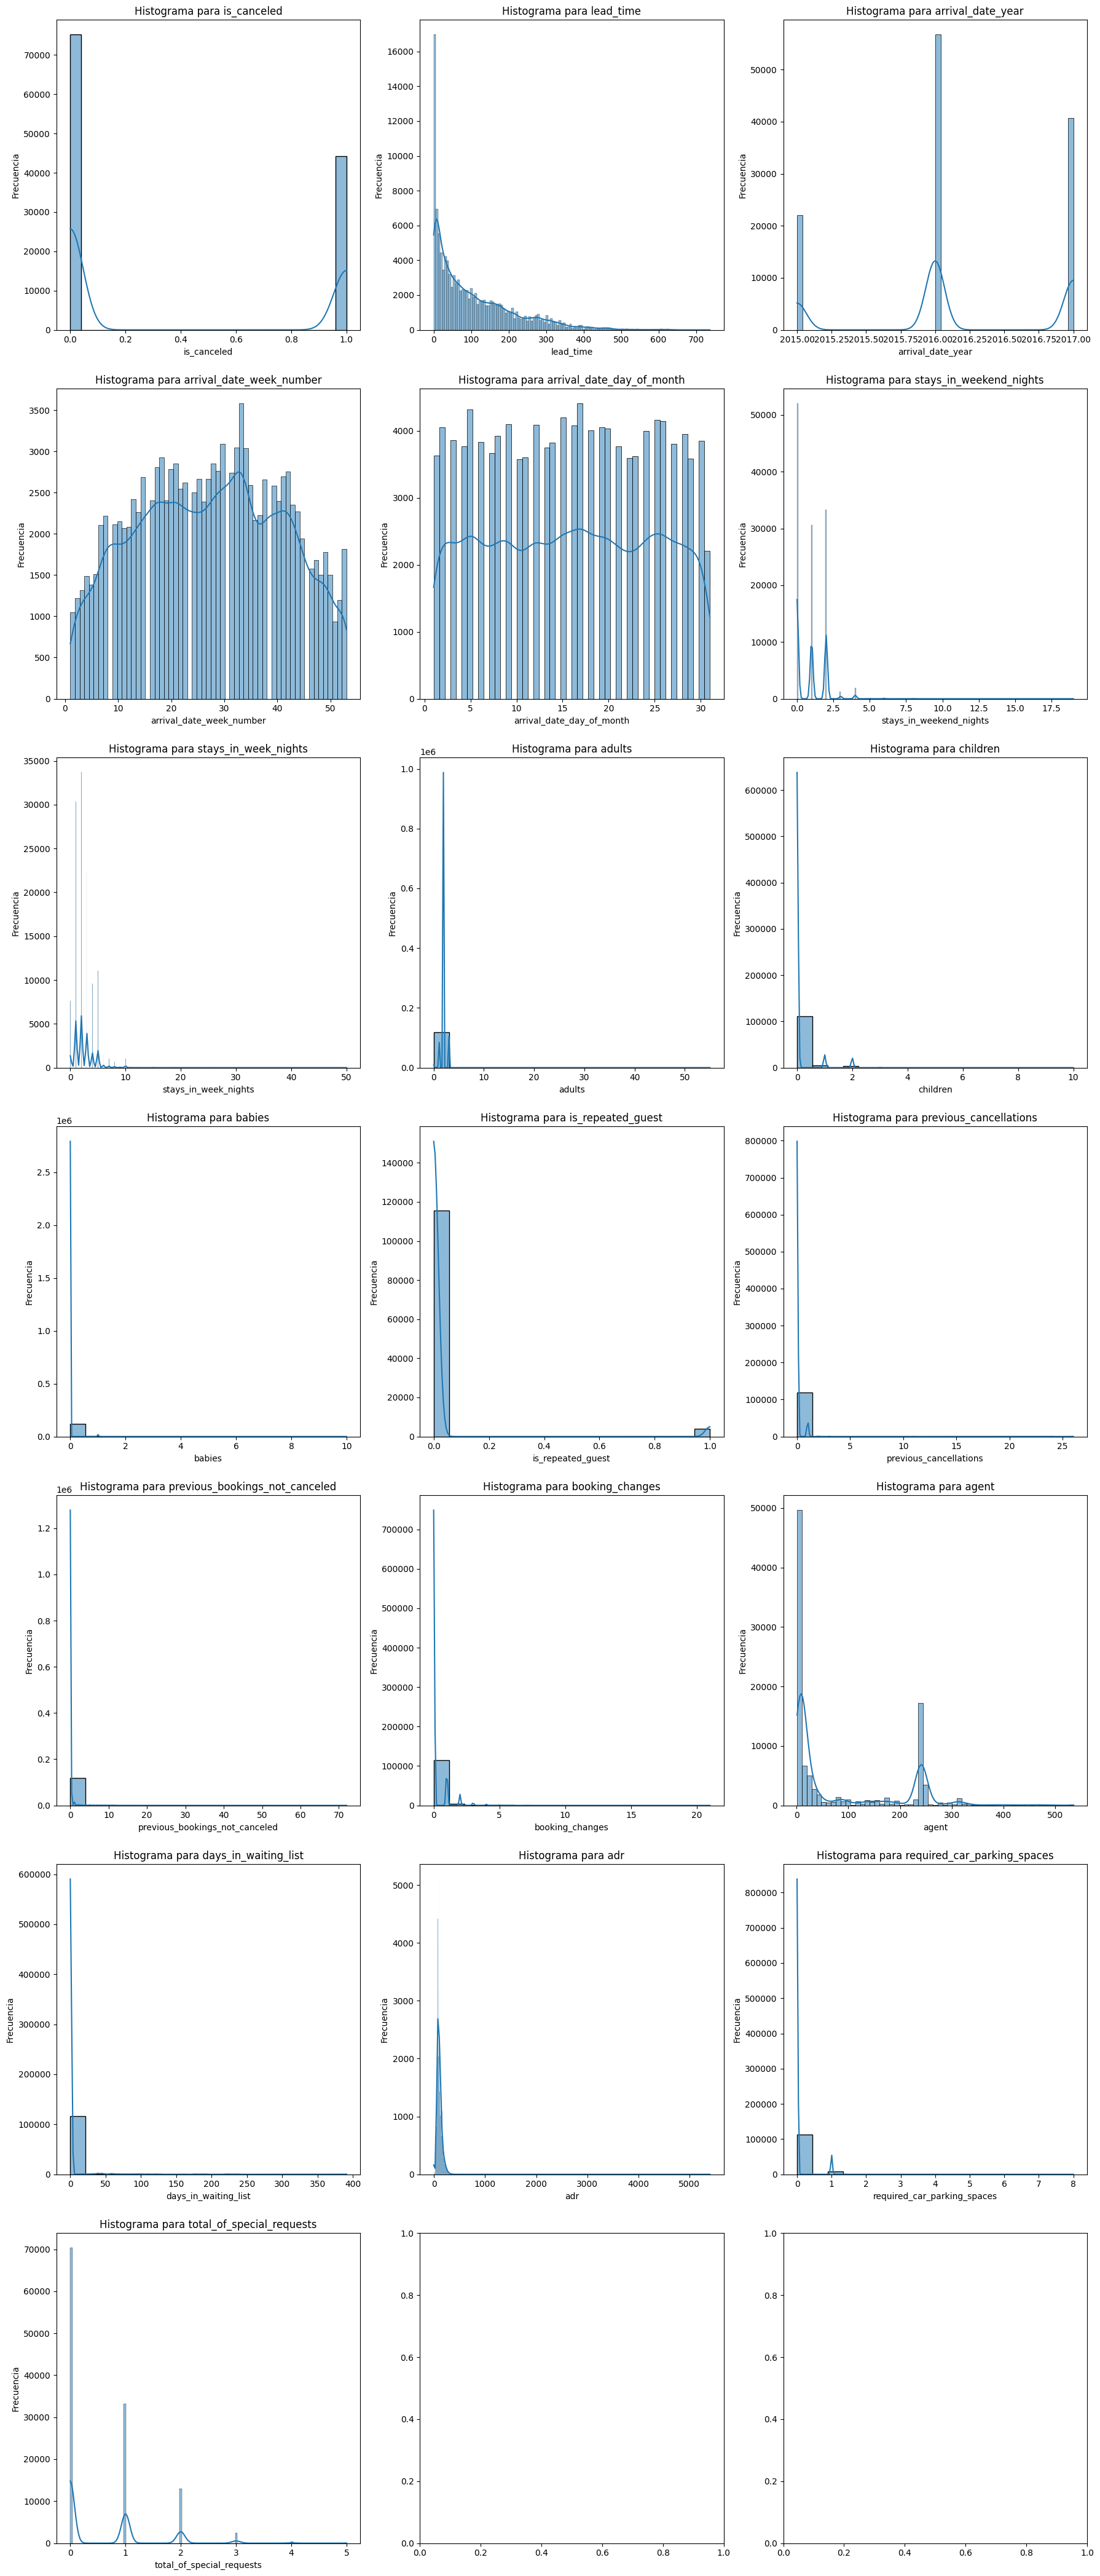

In [61]:

plot_histograms(df_hotel_booking, numerical_columns)

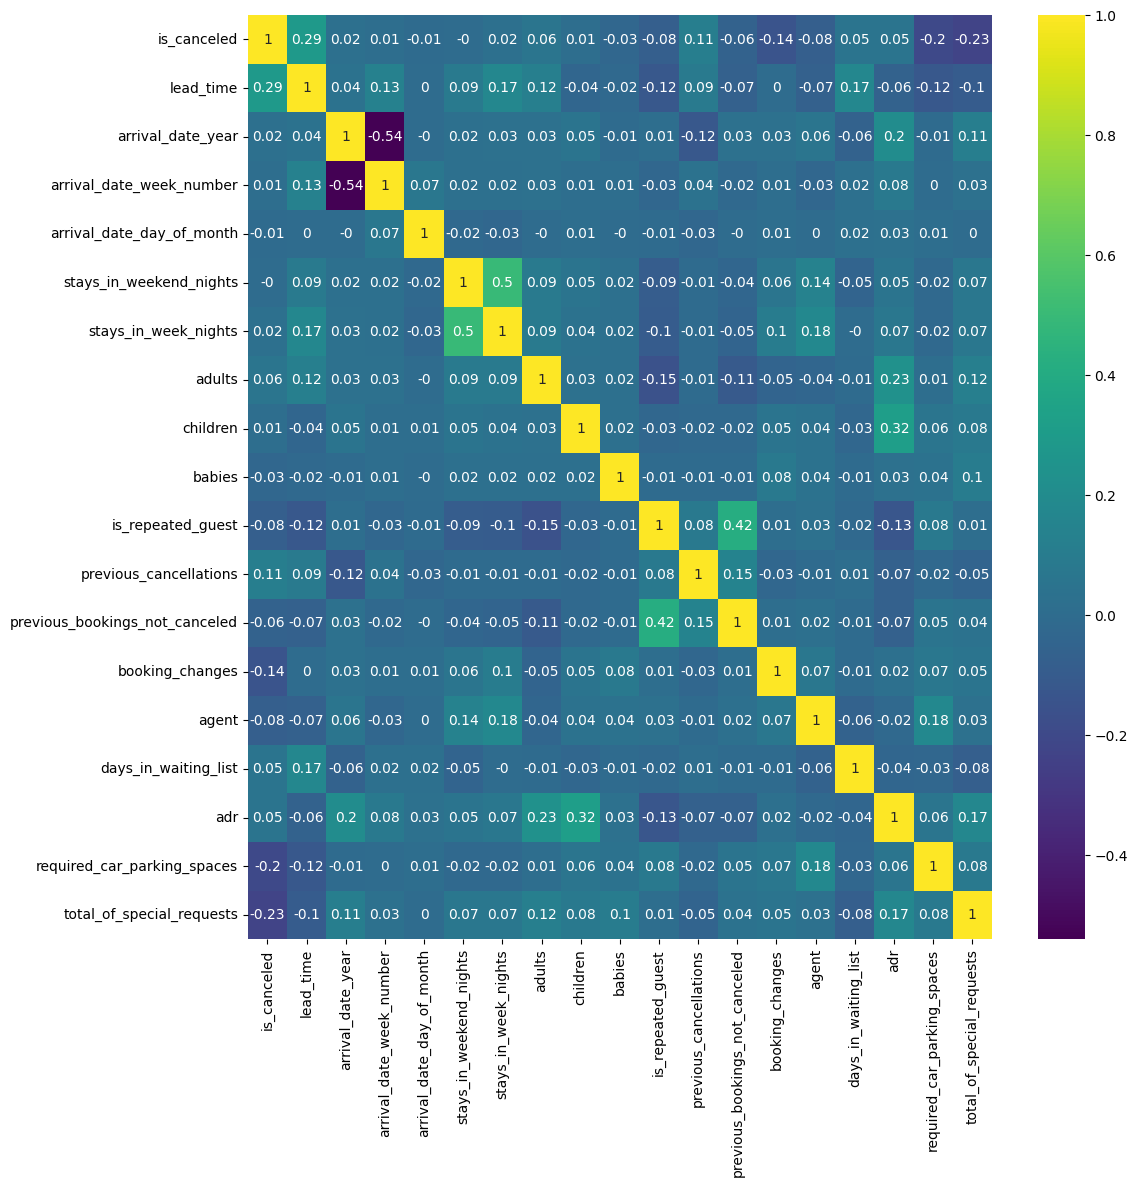

In [64]:
# Calcula la correlación
corr = df_hotel_booking[numerical_columns].corr().round(2)

# Crea la figura con un tamaño de 12x12
plt.figure(figsize=(12, 12))

# Dibuja la heatmap
sns.heatmap(corr, annot=True, cmap='viridis')

# Muestra la figura
plt.show()

In [24]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(df_hotel_booking[categorical_columns])

ohe_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_columns))
ohe_df.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## **Divide the Data into Independent (X) and Dependent (y) Variables**

In [8]:
X = df_hotel_booking.drop(['is_canceled'], axis=1).copy() # indenpendent variables
y = df_hotel_booking['is_canceled'].copy() # denpendent (target)

## **Split the Data**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=.6)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, train_size=0.5)

print(len(X_train), len(X_test), len(X_val))

71634 23878 23878


## **Pipeline for Pre Processing**

### Building Pipeline

In [10]:
from sklearn.preprocessing import OneHotEncoder, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline


# -----------------------------------------------------------------------------------------------------
# One-hot encoder
# -----------------------------------------------------------------------------------------------------
internal_ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
columns_to_encode = [
    "hotel",
    "meal", 
    "distribution_channel", 
    "reserved_room_type", 
    "assigned_room_type", 
    "customer_type"
]

one_hot_encoding = ColumnTransformer([
    (
        'one_hot_encode', internal_ohe, columns_to_encode
    )
])


# -----------------------------------------------------------------------------------------------------
# Binarizer
# -----------------------------------------------------------------------------------------------------
internal_binarizer = Binarizer()
columns_to_binarize = [
    "total_of_special_requests", 
    "required_car_parking_spaces", 
    "booking_changes", 
    "previous_bookings_not_canceled", 
    "previous_cancellations",
]
# primero convierte a variables dummy
binarizer = ColumnTransformer([
    (
        'binarizer', internal_binarizer, columns_to_binarize
    )
])
# despues aplica ohe
internal_encoder_binarizer = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one_hot_binarized = Pipeline([
    ("binarizer", binarizer),
    ("one_hot_encoder", internal_encoder_binarizer),
])


# -----------------------------------------------------------------------------------------------------
# Scaler
# -----------------------------------------------------------------------------------------------------
internal_scaler = RobustScaler()
columns_to_scale = ["adr"]

scaler = ColumnTransformer([
    ("scaler", internal_scaler, columns_to_scale)
])


# -----------------------------------------------------------------------------------------------------
# Passthrough columns
# -----------------------------------------------------------------------------------------------------
pass_columns = [
    "stays_in_week_nights",
    "stays_in_weekend_nights",
]

passthrough = ColumnTransformer([
    ("pass_columns", "passthrough", pass_columns)
])


# -----------------------------------------------------------------------------------------------------
# Full Preprocessing Pipeline
# -----------------------------------------------------------------------------------------------------
feature_engineering_pipeline  = Pipeline([
    (
        "features",
        FeatureUnion([
            ('categories', one_hot_encoding),
            ('binaries', one_hot_binarized),
            ('scaled', scaler),
            ('passthrough', passthrough)
        ])
    )
])

### Show Pipeline

In [11]:
from sklearn import set_config

set_config(display="diagram")
feature_engineering_pipeline 

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('categories',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['hotel',
                                                                                   'meal',
                                                                                   'distribution_channel',
                                                                                   'reserved_room_type',
                                                                                   'assigned_room_type',
                                                                                   'customer_type'])])),
                                                ('binaries',
                                                 Pipeline(steps=[('binarizer',
                                                                  ColumnTransformer(transfo...
                                                                                                    'previous_bookings_not_canceled',
                                                                                                    'previous_cancellations'])])),
                                                                 ('one_hot_encoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse_output=False))])),
                                                ('scaled',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  RobustScaler(),
                                                                                  ['adr'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('pass_columns',
                                                                                  'passthrough',
                                                                                  ['stays_in_week_nights',
                                                                                   'stays_in_weekend_nights'])]))]))])

### Applying Pipeline

In [12]:
# Training set
X_train_transformed = feature_engineering_pipeline.fit_transform(X_train)
X_train_transformed[:2,:]

array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.28736842, 10.        ,  4.        ],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.

In [13]:
# Test set
X_val_transformed = feature_engineering_pipeline.transform(X_val)
X_val_transformed[:2,:]

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        , -0.36315789,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.

In [14]:
# Test set
X_test_transformed = feature_engineering_pipeline.transform(X_test)
X_test_transformed[:2,:]

array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        , -0.95701754,  4.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.

## **Modeling**

### Select the Algorithms

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Diccionario de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost Classifier": XGBClassifier(),
}


### Train de Models

In [33]:
# Función para entrenar modelos
def train_models(models, X_train, y_train):
    trained_models = {}
    for model_name, model in models.items():
        print(f"{model_name} training...!")
        model.fit(X_train, y_train)        
        trained_models[model_name] = model
        print(f"{model_name} success! \n")
    return trained_models

In [34]:
trained_models=train_models(models, X_train_transformed, y_train)

Logistic Regression training...!
Logistic Regression success! 

Decision Tree training...!
Decision Tree success! 

Random Forest training...!
Random Forest success! 

XGBoost Classifier training...!
XGBoost Classifier success! 



## **Evaluation**

In [35]:
def eval_models(models, X_true, y_true):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    # Evaluar modelos
    results = []
    for model_name, model in models.items():
        # predict
        y_pred = model.predict(X_true)
        # evaluate
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })
    return pd.DataFrame(results)



def show_report_eval_models(models, X_true, y_true):
    from sklearn.metrics import classification_report
    
    for model_name, model in models.items():
        y_pred = model.predict(X_true)
        print(f'>> {model_name.upper()} <<')
        print(classification_report(y_true, y_pred), '\n')

Training dataset

In [36]:
models_values_eval = eval_models(trained_models, X_train_transformed, y_train)
models_values_eval

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.775679,0.731624,0.625263,0.674275
1,Decision Tree,0.943979,0.952555,0.893647,0.922161
2,Random Forest,0.943881,0.938004,0.908947,0.923247
3,XGBoost Classifier,0.824176,0.821378,0.672820,0.739714


Evaluation dataset

In [37]:
models_values_eval = eval_models(trained_models, X_val_transformed, y_val)
models_values_eval

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.771840,0.729525,0.609684,0.664243
1,Decision Tree,0.794623,0.731117,0.704152,0.717381
2,Random Forest,0.808066,0.755401,0.712072,0.733096
3,XGBoost Classifier,0.810118,0.800839,0.648263,0.716519


Testing dataset

In [38]:
models_values_eval = eval_models(trained_models, X_test_transformed, y_test)
models_values_eval

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.771380,0.719509,0.620489,0.666341
1,Decision Tree,0.792529,0.724692,0.703244,0.713807
2,Random Forest,0.805721,0.747257,0.713147,0.729804
3,XGBoost Classifier,0.809951,0.791489,0.656346,0.717610


In [39]:
show_report_eval_models(trained_models, X_test_transformed, y_val)

>> LOGISTIC REGRESSION <<
              precision    recall  f1-score   support

           0       0.63      0.68      0.66     15039
           1       0.37      0.32      0.34      8839

    accuracy                           0.55     23878
   macro avg       0.50      0.50      0.50     23878
weighted avg       0.53      0.55      0.54     23878
 

>> DECISION TREE <<
              precision    recall  f1-score   support

           0       0.63      0.64      0.63     15039
           1       0.37      0.35      0.36      8839

    accuracy                           0.53     23878
   macro avg       0.50      0.50      0.50     23878
weighted avg       0.53      0.53      0.53     23878
 

>> RANDOM FOREST <<
              precision    recall  f1-score   support

           0       0.63      0.65      0.64     15039
           1       0.37      0.35      0.36      8839

    accuracy                           0.54     23878
   macro avg       0.50      0.50      0.50     23878
weig

## **Hiperparameter Tuning**

In [43]:
# Hyperparameter tuning

params = {
    "Logistic Regression":{
        'C': [0.1, 1, 10],  # Regularization strength
        'penalty': ['l2'],  # Type of regularization
        'max_iter': [1000, 3000],  # Maximum number of iterations
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 50],
    },
    "Random Forest": {
        'n_estimators': [128, 256], #32, 64, 128, 256],
        #'max_depth': [None, 10, 50],
    },
    "XGBoost Classifier": {
        'learning_rate': [0.1, 0.05],# 0.01, 0.05],
        'n_estimators': [16, 128, 256], #16, 32, 64, 128, 256],
    }
}

In [44]:
from sklearn.model_selection import GridSearchCV


def optimize_hyperparameters(models, params, X_train, y_train):
    best_models = {}
    for name, model in models.items():
        param_grid = params.get(name, {})
        if param_grid:
            print(name.upper(), 'Training ...!')
            search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
            search.fit(X_train, y_train)
            best_models[name] = search.best_estimator_
            print(name, 'Success!')
        else:
            model.fit(X_train, y_train)
            best_models[name] = model
    return best_models


best_models = optimize_hyperparameters(models, params, X_train_transformed, y_train)

Logistic Regression
Decision Tree
Random Forest
XGBoost Classifier


In [45]:
# Evaluar los mejores modelos
results_df = eval_models(best_models, X_val_transformed, y_val)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.771589,0.730303,0.607195,0.663084
1,Decision Tree,0.794288,0.728980,0.707207,0.717928
2,Random Forest,0.809699,0.758206,0.713429,0.735136
3,XGBoost Classifier,0.804716,0.798286,0.632198,0.705600
